##  Predicting the best location for a grocery store in San Francisco's Outer Richmond Neighborhood

Capstone Project - The Battle of Neighborhoods (Week 1)

## Introduction

San Francisco is located along Northern California's majestic coastline and inhabited by an economically and culturally diverse population. Despite its worldwide fame, San Francisco is a relatively small city with a population of about 884,000. At roughly 7 miles x 7 miles, the city is largely walkable. While some characteristics of its 37 neighborhoods overlap, each is uniquely distinct and the presence or absence of basic services such as a public transportation stop, cafes, or grocery stores can have enormous impacts on the living experiences and sense of community among local residents.
As a consequence of being located in the epicenter of the tech boom, the cost of living in San Francisco Bay Area has skyrocketed over the last decade. With the exodus of local residents and shops, many neighborhoods are unrecognizable. The individualization of previously shared social experiences (transportation, shopping, etc) has further unraveled the social cohesion and percieved livibility of certain neighborhoods. Privatized, autoschediastic responses to underdeveloped infrastructure (Uber instead of an expansive metro system, grocery delivery apps instead of building grocery stores in neighborhoods with food deserts, a few mobile toilets instead of public bathrooms etc) make it increasingly difficult for people to connect with their neighbors.

## Business Problem and Background

A group of neighbors from the Outer Richmond neighborhood in San Francisco have reached out to their district Representative at City Hall with regard to the unneccesary and abnormal inconveniences they have to deal with on a daily basis due to an absence of healthy grocery stores carrying local produce in their neighborhood. In turn, the City has created a task force to respond to the problem. They will collect data and analyze the geography and population of the neighborhood, the presence of existing grocery stores, locations that are absent of grocery stores, locations of weekly farmers markets, transporation location, and parks.

## Description of the data and how it will be used to solve the problem¶

Data will be gathered from various sources, including:
DataSF Neighborhood data https://data.sfgov.org/Geographic-Locations-and-Boundaries/Planning-Neighborhood-Groups-Map/iacs-ws63 in order to understand neighborhood demographics
Data SF Bus Stop data https://data.sfgov.org/Transportation/Muni-Stops/i28k-bkz6 in order to analyze optimal location data
FourSquare to analyze the presence of existing grocery stores in the neighborhood.

In [1]:
# import libraries 

import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
from bs4 import BeautifulSoup
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import random # library for random number generation

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    altair-4.0.1               |             py_0         575 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.0 MB

The following NEW packages will be 

## Define Foursquare Credentials and Version

In [2]:
CLIENT_ID = 'DQLONZNSPHOOLJXVN33SRSDTWWEJW3ESAUTNFUYDNB5HZDWV' # your Foursquare ID
CLIENT_SECRET = 'KD1SWME3OICNPAFCHBKACMFXQ0WB2AWPEKVV2FOVXYZMGUUI' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: DQLONZNSPHOOLJXVN33SRSDTWWEJW3ESAUTNFUYDNB5HZDWV
CLIENT_SECRET:KD1SWME3OICNPAFCHBKACMFXQ0WB2AWPEKVV2FOVXYZMGUUI


In [3]:
#find latitude and longitude coordinates for the Richmond Neighborhood Center 
address = '741 30th Avenue, San Francisco, CA 94121'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

37.775101899999996 -122.49030335


In [4]:
#define a query to search for grocery stores that are within 2414 metres (about 1.5 miles, which is the distance from the Richmond Neighborhood Center to the parameters fo the neighborhood)
search_query = 'safeway, produce'
radius = 2414
print(search_query + ' .... OK!')

safeway, produce .... OK!


In [5]:
#define the coresponding URL
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=DQLONZNSPHOOLJXVN33SRSDTWWEJW3ESAUTNFUYDNB5HZDWV&client_secret=KD1SWME3OICNPAFCHBKACMFXQ0WB2AWPEKVV2FOVXYZMGUUI&ll=37.775101899999996,-122.49030335&v=20180604&query=safeway, produce&radius=2414&limit=30'

In [6]:
#send the GET Request and examine the results
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e4f700fc8cff2001cde27c7'},
 'response': {'venues': [{'id': '4b00c4dff964a520094122e3',
    'name': 'Safeway',
    'location': {'address': '850 LA Playa St',
     'crossStreet': 'btwn Cabrillo & Fulton St',
     'lat': 37.7724915,
     'lng': -122.5096656,
     'labeledLatLngs': [{'label': 'display',
       'lat': 37.7724915,
       'lng': -122.5096656}],
     'distance': 1728,
     'postalCode': '94121',
     'cc': 'US',
     'city': 'San Francisco',
     'state': 'CA',
     'country': 'United States',
     'formattedAddress': ['850 LA Playa St (btwn Cabrillo & Fulton St)',
      'San Francisco, CA 94121',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d118951735',
      'name': 'Grocery Store',
      'pluralName': 'Grocery Stores',
      'shortName': 'Grocery Store',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_grocery_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-15822

In [7]:
# get relevant part of JSON and transform it into a pandas dataframe
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head(30)

categories  hasPerk  \
0   [{'id': '4bf58dd8d48988d118951735', 'name': 'G...    False   
1   [{'id': '4bf58dd8d48988d118951735', 'name': 'G...    False   
2   [{'id': '4bf58dd8d48988d118951735', 'name': 'G...    False   
3                                                  []    False   
4   [{'id': '4bf58dd8d48988d10f951735', 'name': 'P...    False   
5   [{'id': '4bf58dd8d48988d16d941735', 'name': 'C...    False   
6   [{'id': '4f4531084b9074f6e4fb0101', 'name': 'R...    False   
7   [{'id': '4bf58dd8d48988d1ff941735', 'name': 'M...    False   
8   [{'id': '50be8ee891d4fa8dcc7199a7', 'name': 'M...    False   
9   [{'id': '4bf58dd8d48988d118951735', 'name': 'G...    False   
10  [{'id': '4bf58dd8d48988d118951735', 'name': 'G...    False   
11  [{'id': '4bf58dd8d48988d118951735', 'name': 'G...    False   
12  [{'id': '4bf58dd8d48988d118951735', 'name': 'G...    False   
13  [{'id': '4bf58dd8d48988d118951735', 'name': 'G...    False   
14  [{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...    False   
15  [{'id': '4bf58dd8d48988d118951735', 'name': 'G...    False   
16  [{'id': '4d954b0ea243a5684a65b473', 'name': 'C...    False   
17  [{'id': '4bf58dd8d48988d16a941735', 'name': 'B...    False   
18  [{'id': '4bf58dd8d48988d118951735', 'name': 'G...    False   
19  [{'id': '4bf58dd8d48988d126951735', 'name': 'V...    False   
20  [{'id': '4bf58dd8d48988d118951735', 'name': 'G...    False   
21  [{'id': '4bf58dd8d48988d1fa941735', 'name': 'F...    False   

                          id location.address location.cc  location.city  \
0   4b00c4dff964a520094122e3  850 LA Playa St          US  San Francisco   
1   4ae0a907f964a520638121e3  2350 Noriega St          US  San Francisco   
2   49f753e6f964a520846c1fe3      735 7th Ave          US  San Francisco   
3   51929796498e78cd33926d81  850 LA Playa St          US  San Francisco   
4   5911d9c6603d2a337fcc25ac      735 7th Ave          US  San Francisco   
5   4b5cc44cf964a520fd4229e3   3635 Balboa St          US  San Francisco   
6   505cf18ce4b0f1d612b46967  2350 Noriega St          US  San Francisco   
7   4c7c0976794e224b0e166d28  850 LA Playa St          US  San Francisco   
8   56d2287e498e81135110f135   3635 Balboa St          US  San Francisco   
9   4a12f591f964a520a3771fe3  2354 Clement St          US  San Francisco   
10  4af60865f964a5205f0022e3  2214 Clement St          US  San Francisco   
11  4aca9f92f964a5209cc220e3  5527 Geary Blvd          US  San Francisco   
12  4bb670b346d4a593e23cc6c0   538 Clement St          US  San Francisco   
13  4fc0156ae4b03278511f336f   843 Clement St          US  San Francisco   
14  4b228afcf964a520b34824e3  5621 Geary Blvd          US  San Francisco   
15  4c47d8cb417b20a1bd20dfa9  5015 Geary Blvd          US  San Francisco   
16  4a7772e6f964a52087e41fe3  2955 Clement St          US  San Francisco   
17  4f324aad19836c91c7c9467b   2165 Irving St          US  San Francisco   
18  4a919f80f964a520001b20e3   2101 Irving St          US  San Francisco   
19  5074f210e4b0a0c5e39241a0  2350 Noriega St          US  San Francisco   
20  4bdf6be2e75c0f477e30cb03              NaN          US            NaN   
21  4e481bb745dd2955e5ae1a4f   645 Clement St          US  San Francisco   

   location.country         location.crossStreet  location.distance  \
0     United States    btwn Cabrillo & Fulton St               1728   
1     United States                  at 30th Ave               2333   
2     United States               at Cabrillo St               2208   
3     United States                          NaN               1571   
4     United States                          NaN               2190   
5     United States                  37th Avenue                593   
6     United States                  30th Avenua               2477   
7     United States    btwn Fulton St & 48th Ave               1711   
8     United States  Between 37th And 38 Avenues                675   
9     United States                 at 25th Ave.                9

In [8]:
# Define information of interest and filter dataframe
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories', 'location.postalCode', 'location.lat', 'location.lng']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

name          categories postalCode  \
0                               Safeway       Grocery Store      94121   
1                               Safeway       Grocery Store      94122   
2                               Safeway       Grocery Store      94118   
3                 Safeway Home Delivery                None      94121   
4                      Safeway Pharmacy            Pharmacy      94118   
5                        Balboa Produce                Café      94121   
6             Safeway Recycling Station  Recycling Facility      94122   
7        NexCycle - Safeway Ocean Beach  Miscellaneous Shop      94121   
8                 Balboa Produce Market              Market      94121   
9         25th & Clement Produce Market       Grocery Store      94121   
10                    El Grande Produce       Grocery Store      94121   
11              Richmond Produce Market       Grocery Store      94121   
12  Best & Fresh Produce Market 好顺发食品公司       Grocery Store      94118   
13              Apple Land Produce 新發蔬店       Grocery Store      94118   
14      Israel Kosher Meats and Produce          Restaurant      94121   
15                 g & g finest produce       Grocery Store      94118   
16                  Lincoln Park Market   Convenience Store      94121   
17                    Wha Fa Produce Co              Bakery      94122   
18                 22nd & Irving Market       Grocery Store      94122   
19                               Redbox         Video Store      94122   
20                      Clement Produce       Grocery Store        NaN   
21                      Healthy Produce      Farmers Market      94118   

          lat         lng  
0   37.772492 -122.509666  
1   37.754172 -122.488817  
2   37.774602 -122.465211  
3   37.770542 -122.507210  
4   37.774442 -122.465424  
5   37.774570 -122.497016  
6   37.755541 -122.476873  
7   37.771860 -122.509317  
8   37.775496 -122.497962  
9   37.782069 -122.484907  
10  37.782132 -122.483037  
11  37.780264 -122.478902  
12  37.782907 -122.465035  
13  37.782567 -122.468473  
14  37.780156 -122.479861  
15  37.780427 -122.473202  
16  37.781836 -122.490956  
17  37.763183 -122.481158  
18  37.763323 -122.480479  
19  37.753700 -122.488790  
20  37.782879 -122.466432  
21  37.782883 -122.466305

In [9]:
newdf = dataframe_filtered.loc[(dataframe_filtered.postalCode == "94121")]
newdf

name          categories postalCode        lat  \
0                           Safeway       Grocery Store      94121  37.772492   
3             Safeway Home Delivery                None      94121  37.770542   
5                    Balboa Produce                Café      94121  37.774570   
7    NexCycle - Safeway Ocean Beach  Miscellaneous Shop      94121  37.771860   
8             Balboa Produce Market              Market      94121  37.775496   
9     25th & Clement Produce Market       Grocery Store      94121  37.782069   
10                El Grande Produce       Grocery Store      94121  37.782132   
11          Richmond Produce Market       Grocery Store      94121  37.780264   
14  Israel Kosher Meats and Produce          Restaurant      94121  37.780156   
16              Lincoln Park Market   Convenience Store      94121  37.781836   

           lng  
0  -122.509666  
3  -122.507210  
5  -122.497016  
7  -122.509317  
8  -122.497962  
9  -122.484907  
10 -122.483037  
11 -122.478902  
14 -122.479861  
16 -122.490956

In [10]:
newdf2 = newdf[newdf.categories.isin(["Grocery Store", "Market"])]
newdf2

name     categories postalCode        lat  \
0                         Safeway  Grocery Store      94121  37.772492   
8           Balboa Produce Market         Market      94121  37.775496   
9   25th & Clement Produce Market  Grocery Store      94121  37.782069   
10              El Grande Produce  Grocery Store      94121  37.782132   
11        Richmond Produce Market  Grocery Store      94121  37.780264   

           lng  
0  -122.509666  
8  -122.497962  
9  -122.484907  
10 -122.483037  
11 -122.478902

In [11]:
rating = [5.9, 0, 7.1, 6.6, 6.1]
 
newdf2.assign(Rating=rating)

name     categories postalCode        lat  \
0                         Safeway  Grocery Store      94121  37.772492   
8           Balboa Produce Market         Market      94121  37.775496   
9   25th & Clement Produce Market  Grocery Store      94121  37.782069   
10              El Grande Produce  Grocery Store      94121  37.782132   
11        Richmond Produce Market  Grocery Store      94121  37.780264   

           lng  Rating  
0  -122.509666     5.9  
8  -122.497962     0.0  
9  -122.484907     7.1  
10 -122.483037     6.6  
11 -122.478902     6.1

In [12]:
newdf2_grocery = newdf2.append({'name': 'Grocery Outlet Bargain Market', 'categories': 'Grocery Store', 'postalCode': '94121', 'lat': 53.273, 'lng': -7.77832031}, ignore_index=True)
newdf2_grocery

name     categories postalCode        lat  \
0                        Safeway  Grocery Store      94121  37.772492   
1          Balboa Produce Market         Market      94121  37.775496   
2  25th & Clement Produce Market  Grocery Store      94121  37.782069   
3              El Grande Produce  Grocery Store      94121  37.782132   
4        Richmond Produce Market  Grocery Store      94121  37.780264   
5  Grocery Outlet Bargain Market  Grocery Store      94121  53.273000   

          lng  
0 -122.509666  
1 -122.497962  
2 -122.484907  
3 -122.483037  
4 -122.478902  
5   -7.778320

In [13]:
rating = [5.9, 'Nan', 7.1, 6.6, 6.1, 7.5]
 
newdf2_grocery.assign(Rating=rating)

name     categories postalCode        lat  \
0                        Safeway  Grocery Store      94121  37.772492   
1          Balboa Produce Market         Market      94121  37.775496   
2  25th & Clement Produce Market  Grocery Store      94121  37.782069   
3              El Grande Produce  Grocery Store      94121  37.782132   
4        Richmond Produce Market  Grocery Store      94121  37.780264   
5  Grocery Outlet Bargain Market  Grocery Store      94121  53.273000   

          lng Rating  
0 -122.509666    5.9  
1 -122.497962    Nan  
2 -122.484907    7.1  
3 -122.483037    6.6  
4 -122.478902    6.1  
5   -7.778320    7.5

In [14]:
# Let's visualize the grocery stores that are nearby
newdf2_grocery.name

0                          Safeway
1            Balboa Produce Market
2    25th & Clement Produce Market
3                El Grande Produce
4          Richmond Produce Market
5    Grocery Outlet Bargain Market
Name: name, dtype: object

In [16]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Richmond Neighborhood Center

# add a red circle marker to represent the Richmond Neighborhood Center
folium.features.CircleMarker(
    [latitude, longitude],
    radius=2,
    color='red',
    popup='Richmond Neighborhood Center',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the grocery stores as blue circle markers
for lat, lng, label in zip(newdf2_grocery.lat, newdf2_grocery.lng, newdf2_grocery.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=10,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

##  Explore a Given Venue

In [17]:
#  Let's explore the biggest grocery store in the Outer Richmond, Safeway La Playa 
venue_id = '4b00c4dff964a520094122e3' # ID of Safeway La Playa 
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
url

'https://api.foursquare.com/v2/venues/4b00c4dff964a520094122e3?client_id=DQLONZNSPHOOLJXVN33SRSDTWWEJW3ESAUTNFUYDNB5HZDWV&client_secret=KD1SWME3OICNPAFCHBKACMFXQ0WB2AWPEKVV2FOVXYZMGUUI&v=20180604'

In [18]:
# Send GET request for result
result = requests.get(url).json()
print(result['response']['venue'].keys())
result['response']['venue']

dict_keys(['id', 'name', 'contact', 'location', 'canonicalUrl', 'categories', 'verified', 'stats', 'url', 'likes', 'dislike', 'ok', 'rating', 'ratingColor', 'ratingSignals', 'allowMenuUrlEdit', 'beenHere', 'specials', 'photos', 'reasons', 'description', 'storeId', 'page', 'hereNow', 'createdAt', 'tips', 'shortUrl', 'timeZone', 'listed', 'hours', 'popular', 'pageUpdates', 'inbox', 'attributes', 'bestPhoto', 'colors'])


{'id': '4b00c4dff964a520094122e3',
 'name': 'Safeway',
 'contact': {'phone': '4153874664',
  'formattedPhone': '(415) 387-4664',
  'twitter': 'safeway',
  'facebook': '106141736142673',
  'facebookUsername': 'SafewaySanFranciscoCA785',
  'facebookName': 'Safeway'},
 'location': {'address': '850 LA Playa St',
  'crossStreet': 'btwn Cabrillo & Fulton St',
  'lat': 37.7724915,
  'lng': -122.5096656,
  'labeledLatLngs': [{'label': 'display',
    'lat': 37.7724915,
    'lng': -122.5096656}],
  'postalCode': '94121',
  'cc': 'US',
  'city': 'San Francisco',
  'state': 'CA',
  'country': 'United States',
  'formattedAddress': ['850 LA Playa St (btwn Cabrillo & Fulton St)',
   'San Francisco, CA 94121',
   'United States']},
 'canonicalUrl': 'https://foursquare.com/v/safeway/4b00c4dff964a520094122e3',
 'categories': [{'id': '4bf58dd8d48988d118951735',
   'name': 'Grocery Store',
   'pluralName': 'Grocery Stores',
   'shortName': 'Grocery Store',
   'icon': {'prefix': 'https://ss3.4sqi.net/img/

In [19]:
# check the rating of the largest local grocery store
# get Safeway La Playa overall rating
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

5.9


In [20]:
# check the rating of another local grocery store
venue_id = '4b5cc44cf964a520fd4229e3' # ID of Balboa Produce
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

This venue has not been rated yet.


In [21]:
# check the rating of the second largest grocery store
venue_id = '5253feaf498ee244bf04cc79' # ID of Grocery Outlet Bargain Market
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

7.5


In [22]:
# check the rating of another local grocery store
venue_id = '4af60865f964a5205f0022e3' # ID of El Grande Produce
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

6.6


In [23]:
# check the rating of another local grocery store
venue_id = '4aca9f92f964a5209cc220e3' # ID of Richmond Produce Market
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

6.1


In [24]:
# check the rating of another local grocery store
venue_id = '4a12f591f964a520a3771fe3' # ID of 25th and Clement Market
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

7.2


In [25]:
# check the rating of the largest grocery store
venue_id = '4b00c4dff964a520094122e3' # ID of Safeway La Playa
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

5.9


In [26]:
# Since this grocery store is the largest in the neighborhood, let's explore it further.
# Get the number of tips
result['response']['venue']['tips']['count']

17

In [27]:
## Safewat La Plata Tips
limit = 17 # set limit to be greater than or equal to the total number of tips
url = 'https://api.foursquare.com/v2/venues/{}/tips?client_id={}&client_secret={}&v={}&limit={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION, limit)

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e4f726efb34b5001b6ceaef'},
 'response': {'tips': {'count': 17,
   'items': [{'id': '566c4df6498e4c068d710ea1',
     'createdAt': 1449938422,
     'text': 'Super friendly, largest Safeway in town. During busy times manager will get the lines going.',
     'type': 'user',
     'canonicalUrl': 'https://foursquare.com/item/566c4df6498e4c068d710ea1',
     'lang': 'en',
     'likes': {'count': 0, 'groups': []},
     'logView': True,
     'agreeCount': 3,
     'disagreeCount': 0,
     'lastVoteText': 'Upvoted 6 days ago',
     'lastUpvoteTimestamp': 1581723663,
     'todo': {'count': 0},
     'user': {'id': '182684',
      'firstName': 'Amy',
      'lastName': 'B',
      'photo': {'prefix': 'https://fastly.4sqi.net/img/user/',
       'suffix': '/04JXJG52IW2OF2EO.jpg'}},
     'authorInteractionType': 'liked'}]}}}

In [28]:
# Get tips and list of associated features
tips = results['response']['tips']['items']

tip = results['response']['tips']['items'][0]
tip.keys()

dict_keys(['id', 'createdAt', 'text', 'type', 'canonicalUrl', 'lang', 'likes', 'logView', 'agreeCount', 'disagreeCount', 'lastVoteText', 'lastUpvoteTimestamp', 'todo', 'user', 'authorInteractionType'])

In [29]:
# Format column width and display all tips
# because I'm using a personal developer account, I can access only 2 of the restaurant's tips, instead of all 17 tips.
pd.set_option('display.max_colwidth', -1)

tips_df = json_normalize(tips) # json normalize tips

# columns to keep
filtered_columns = ['text', 'agreeCount', 'disagreeCount', 'id', 'user.firstName', 'user.lastName', 'user.gender', 'user.id']
tips_filtered = tips_df.loc[:, filtered_columns]

# display tips
tips_filtered

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


text  \
0  Super friendly, largest Safeway in town. During busy times manager will get the lines going.   

   agreeCount  disagreeCount                        id user.firstName  \
0  3           0              566c4df6498e4c068d710ea1  Amy             

  user.lastName  user.gender user.id  
0  B            NaN           182684

In [30]:
#map using follium
# define the world map
world_map = folium.Map()

# display world map
world_map

In [31]:
# define the world map centered around San Francisco with a low zoom level
world_map = folium.Map(location=[37.7790262, -122.4199061], zoom_start=12)

# display world map
world_map

## Maps with Markers
## Download and Explore San Francisco Bus Stops Dataset

In [32]:
# download and import the data on SF bus stops using pandas read_csv() method
df_bus = pd.read_csv('https://data.sfgov.org/resource/i28k-bkz6.csv')

print('Dataset downloaded and read into a pandas dataframe!')

Dataset downloaded and read into a pandas dataframe!


In [33]:
df_bus.head()

objectid                             stopname trapezestopabbr  \
0  1549      Field Rd&Light House S-NS/SB         FTBRLHSE         
1  365       Townsend & 4th E-FS/BZ               TOWN.4ST         
2  2409      Clement St&4TH Ave SE-FS/BZ          CLMT 4A1         
3  391       23rd Ave&Irving St SW-FS/BZ          23AVIRV0         
4  273       Buena Vista Ter&Roosevelt Way NE-FS  BVTRRSV1         

  rucusstopabbr  stopid   latitude   longitude  accessibilitymask  \
0  NaN           7691    37.821607 -122.529700 NaN                  
1  NaN           7235    37.777278 -122.394631  0.0                 
2  CLMT 4AV      4041    37.782990 -122.461950  0.0                 
3  23AVIRVG      3441    37.763134 -122.481482  0.0                 
4  BVTRRSVT      3820    37.766850 -122.438150  0.0                 

        atstreet         onstreet position orientation  \
0  NaN            NaN              NaN      NaN          
1  4TH ST         TOWNSEND ST      NaN      E            
2  04TH AVE       CLEMENT ST       FS       SE           
3  IRVING ST      23RD AVE         FS       SW           
4  ROOSEVELT WAY  BUENA VISTA TER  FS       NE           

  serviceplanningstoptype  shelter          insert_timestamp   sde_id  \
0  NaN                    NaN       2019-09-11T18:58:28.000Z  1639916   
1  NaN                     0.0      2019-09-11T18:58:28.000Z  1633595   
2  BZ                      0.0      2019-09-11T18:58:28.000Z  1638027   
3  BZ                      1.0      2019-09-11T18:58:28.000Z  1632868   
4  NaN                     0.0      2019-09-11T18:58:28.000Z  1633340   

   signupid  supervisor_district  \
0  120      NaN                    
1  120      NaN                    
2  120      NaN                    
3  120      NaN                    
4  120      NaN                    

                                              point  \
0  \n,  \n(37.821602060030195, -122.52968676293023)   
1  \n,  \n(37.77727305378995, -122.3946177882367)     
2  \n,  \n(37.782985058237585, -122.46193677851733)   
3  \n,  \n(37.76312906129481, -122.48146877590544)    
4  \n,  \n(37.7668450578261, -122.43813678294127)     

   :@computed_region_6qbp_sg9q  :@computed_region_qgnn_b9vv  \
0 NaN                          NaN                            
1  34.0                         1.0                           
2  5.0                          8.0                           
3  39.0                         10.0                          
4  113.0                        7.0                           

   :@computed_region_26cr_cadq  :@computed_region_ajp5_b2md  
0 NaN                          NaN                           
1  10.0                         4.0                          
2  4.0                          11.0                         
3  7.0                          35.0                         
4  5.0                          5.0

In [34]:
# find out how many entries there are in our dataset
df_bus.shape

(1000, 23)

In [35]:
limit = 1000
df_bus = df_bus.iloc[0:limit, :]

In [36]:
df_bus.shape

(1000, 23)

In [37]:
# visualize where these bus stops are in the Outer Richmond Neighborhood of San Francisco
# Richmond Neighborhood Center latitude and longitude values

latitude = 37.775101899999996
longitude = -122.49030335

In [38]:
# create map and display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=14)

# display the map of San Francisco
sanfran_map

In [39]:
# superimpose the locations of the bus stops onto the map using Folium
# instantiate a feature group for the objectid in the dataframe
bus = folium.map.FeatureGroup()

# loop through the bus stops and add each to the incidents feature group
for lat, lng, in zip(df_bus.latitude, df_bus.longitude):
    bus.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
sanfran_map.add_child(bus)


In [40]:
# add markers
# create map and display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=15)

# loop through the bus stops and add each to the map
for lat, lng, label in zip(df_bus.latitude, df_bus.longitude, df_bus.stopname):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5, # define how big you want the circle markers to be
        color='yellow',
        fill=True,
        popup=label,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(sanfran_map)

# show map
sanfran_map


In [41]:
from folium import plugins

# let's start again with a clean copy of the map of San Francisco
sanfran_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
bus = plugins.MarkerCluster().add_to(sanfran_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df_bus.latitude, df_bus.longitude, df_bus.stopname):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(bus)

# display map
sanfran_map

## Explore a location

In [42]:
# get the latitude and longitude values of Richmond Neighborhood Center
latitude = 37.775101899999996
longitude = -122.49030335

In [43]:
#Define URL
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=DQLONZNSPHOOLJXVN33SRSDTWWEJW3ESAUTNFUYDNB5HZDWV&client_secret=KD1SWME3OICNPAFCHBKACMFXQ0WB2AWPEKVV2FOVXYZMGUUI&ll=37.775101899999996,-122.49030335&v=20180604&radius=2414&limit=30'

In [44]:
# Send GET request and examine results
import requests

In [45]:
results = requests.get(url).json()
'There are {} around Richmond Neighborhood Center.'.format(len(results['response']['groups'][0]['items']))

'There are 30 around Richmond Neighborhood Center.'

In [46]:
# Get relevant part of JSON
items = results['response']['groups'][0]['items']
items[0]

{'reasons': {'count': 0,
  'items': [{'summary': 'This spot is popular',
    'type': 'general',
    'reasonName': 'globalInteractionReason'}]},
 'venue': {'id': '4f4c3b8ae4b0f9202359da21',
  'name': 'Cassava',
  'location': {'address': '3519 Balboa St',
   'crossStreet': 'btwn 36th & 37th Ave',
   'lat': 37.775721593034724,
   'lng': -122.49670186250842,
   'labeledLatLngs': [{'label': 'display',
     'lat': 37.775721593034724,
     'lng': -122.49670186250842}],
   'distance': 567,
   'postalCode': '94121',
   'cc': 'US',
   'city': 'San Francisco',
   'state': 'CA',
   'country': 'United States',
   'formattedAddress': ['3519 Balboa St (btwn 36th & 37th Ave)',
    'San Francisco, CA 94121',
    'United States']},
  'categories': [{'id': '4bf58dd8d48988d157941735',
    'name': 'New American Restaurant',
    'pluralName': 'New American Restaurants',
    'shortName': 'New American',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/newamerican_',
     'suffix': '.png'},

In [47]:
# Process JSON and convert it to a clean dataframe
dataframe = json_normalize(items) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# filter the category for each row
dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]

dataframe_filtered.head(10)

name               categories  \
0  Cassava                            New American Restaurant   
1  Hellman Hollow                     Park                      
2  Lindley Meadow                     Park                      
3  Pacific Cafe                       Seafood Restaurant        
4  Golden Gate Park                   Park                      
5  Simple Pleasures Cafe              Café                      
6  Golden Gate Park Disc Golf Course  Disc Golf                 
7  Fiorella                           Italian Restaurant        
8  Aziza Restaurant                   Moroccan Restaurant       
9  Jiangnan Cuisine                   Chinese Restaurant        

                 address  cc           city        country  \
0  3519 Balboa St         US  San Francisco  United States   
1  John F. Kennedy Dr     US  San Francisco  United States   
2  John F Kennedy Dr      US  San Francisco  United States   
3  7000 Geary Blvd        US  San Francisco  United States   
4  501 Stanyan St         US  San Francisco  United States   
5  3434 Balboa St         US  San Francisco  United States   
6  900 John F Kennedy Dr  US  San Francisco  United States   
7  2339 Clement St        US  San Francisco  United States   
8  5800 Geary Blvd        US  San Francisco  United States   
9  3420 Balboa St         US  San Francisco  United States   

                    crossStreet  distance  \
0  btwn 36th & 37th Ave          567        
1  NaN                           806        
2  in Golden Gate Park           518        
3  at 34th Ave                   634        
4  btwn Fulton St & Lincoln Way  940        
5  at 36th Ave                   492        
6  NaN                           529        
7  NaN                           911        
8  NaN                           963        
9  35th Ave                      475        

                                                                          formattedAddress  \
0  [3519 Balboa St (btwn 36th & 37th Ave), San Francisco, CA 94121, United States]           
1  [John F. Kennedy Dr, San Francisco, CA, United States]                                    
2  [John F Kennedy Dr (in Golden Gate Park), San Francisco, CA 94122, United States]         
3  [7000 Geary Blvd (at 34th Ave), San Francisco, CA 94121, United States]                   
4  [501 Stanyan St (btwn Fulton St & Lincoln Way), San Francisco, CA 94117, United States]   
5  [3434 Balboa St (at 36th Ave), San Francisco, CA 94121, United States]                    
6  [900 John F Kennedy Dr, San Francisco, CA 94121, United States]                           
7  [2339 Clement St, San Francisco, CA 94121, United States]                                 
8  [5800 Geary Blvd, San Francisco, CA 94121, United States]                                 
9  [3420 Balboa St (35th Ave), San Francisco, CA 94121, United States]                       

                                                                  labeledLatLngs  \
0  [{'label': 'display', 'lat': 37.775721593034724, 'lng': -122.49670186250842}]   
1  [{'label': 'display', 'lat': 37.76913729221543, 'lng': -122.48509168624878}]    
2  [{'label': 'display', 'lat': 37.770455863056895, 'lng': -122.48985056644018}]   
3  [{'label': 'display', 'lat': 37.77978225449428, 'lng': -122.49442817178449}]    
4  [{'label': 'display', 'lat': 37.76973638665379, 'lng': -122.48204941686708}]    
5  [{'label': 'display', 'lat': 37.77590820018698, 'lng': -122.49580979347229}]    
6  [{'label': 'display', 'lat': 37.771683657985754, 'lng': -122.48611986499944}]   
7  [{'label': 'display', 'lat': 37.78188735290587, 'lng': -122.48450964689253}]    
8  [{'label': 'display', 'lat': 37.780335, 'lng': -122.481575}]                    
9  [{'label': 'display', 'lat': 37.77588961511461, 'lng': -122.49561552630354}]    

         lat         lng    neighborhood postalCode state  \
0  37.775722 -122.496702  NaN             94121      CA     
1  37.769137 -122.485092  NaN             NaN        CA

In [48]:
# visualize these items on the map around Richmond Neighborhood Center
venues_map = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centred around Richmond Neighborhood Center

# add Richmond Neighborhood Center as a red circle mark
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    popup='Richmond Neighborhood Center',
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6
    ).add_to(venues_map)


# add popular spots to the map as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.6
        ).add_to(venues_map)

# display map
venues_map

In [49]:
# analyze the venues that are trending at the time 
# these will be the places with the highest foot traffic
# the venues with the highest foot traffic are fetched live, so they will vary depending on time of day

# define URL
url = 'https://api.foursquare.com/v2/venues/trending?client_id={}&client_secret={}&ll={},{}&v={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION)

# send GET request and get trending venues
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e4f739e0de0d9001bda9264'},
 'response': {'venues': []}}

In [50]:
if len(results['response']['venues']) == 0:
    trending_venues_df = 'No trending venues are available at the moment!'
    
else:
    trending_venues = results['response']['venues']
    trending_venues_df = json_normalize(trending_venues)

    # filter columns
    columns_filtered = ['name', 'categories'] + ['location.distance', 'location.city', 'location.postalCode', 'location.state', 'location.country', 'location.lat', 'location.lng']
    trending_venues_df = trending_venues_df.loc[:, columns_filtered]

    # filter the category for each row
    trending_venues_df['categories'] = trending_venues_df.apply(get_category_type, axis=1)

In [51]:
# display trending venues
trending_venues_df

'No trending venues are available at the moment!'

In [52]:
# Visualize trending venues
if len(results['response']['venues']) == 0:
    venues_map = 'Cannot generate visual as no trending venues are available at the moment!'

else:
    venues_map = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centred around Richmond Neighborhood Center


    # add Richmond Neighborhood Center as a red circle mark
    folium.features.CircleMarker(
        [latitude, longitude],
        radius=10,
        popup='Richmond Neighborhood Center',
        fill=True,
        color='red',
        fill_color='red',
        fill_opacity=0.6
    ).add_to(venues_map)


    # add the trending venues as blue circle markers
    for lat, lng, label in zip(trending_venues_df['location.lat'], trending_venues_df['location.lng'], trending_venues_df['name']):
        folium.features.CircleMarker(
            [lat, lng],
            radius=5,
            poup=label,
            fill=True,
            color='blue',
            fill_color='blue',
            fill_opacity=0.6
        ).add_to(venues_map)
        
# display map
venues_map

'Cannot generate visual as no trending venues are available at the moment!'

## Word Cloud

In [53]:
# install wordcloud
!conda install -c conda-forge wordcloud==1.4.1 --yes
import matplotlib.pyplot as plt

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - wordcloud==1.4.1


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    wordcloud-1.4.1            |           py36_0         324 KB  conda-forge

The following NEW packages will be INSTALLED:

    wordcloud: 1.4.1-py36_0 conda-forge


wordcloud-1.4.1      | 324 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Wordcloud is installed and imported!


In [100]:
# generate a word cloud for all foursquare reviews of Safeway La Playa
text= ("It's a safeway It's conveniently located near Ocean Beach. Planning a beach day BBQ? Come to Safeway for charcoal, food and beverage items Its the main one. Good place to get a large sandwich. Essential Supermarket. Got a little facelift at the end of 2015 so it's a little nicer, but will always suffer the coastal business curse (feels dirty and has dirtbag customers). Super friendly, largest Safeway in town. During busy times manager will get the lines going. Only reason to go here's to get picnic and bonfire essentials – the stuff is rude and generally unhelpful This Safeway is always nice and clean and the staff are friendly Lots of vegan options Bathroom is dirty but if you have to go oh well Good place to pick up a picnic for the beach. Try the coffee vending machine...it's epic! Skip the deli sandwiches here and walk a block north to Fredy's Deli for an amazing sandwich! Not the cleanest place, their breads are TERRIBLE, but they're open 24 hours… Bathrooms are gross and people here active they live on the beach. Nice choice in flowers though (1 of 4 petals via Fondu) There's a recycling center in the parking lot! Trade in those beer cans & bottles for some cash. Then walk inside and buy MORE alcohol! :) Free eggs! Buy some peaches!!!")
    

In [101]:
stopwords = set(STOPWORDS)

In [102]:
# instantiate a word cloud object
safeway_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
safeway_wc.generate(text)

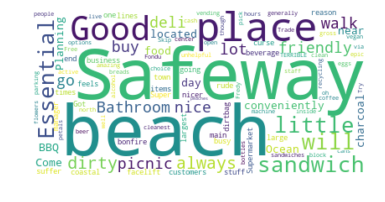

In [103]:
# display the word cloud
plt.imshow(safeway_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

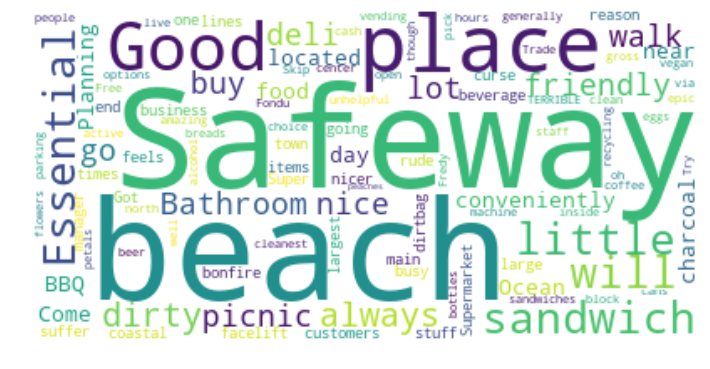

In [104]:
fig = plt.figure()
fig.set_figwidth(12) # set width
fig.set_figheight(16) # set height

# display the cloud
plt.imshow(safeway_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

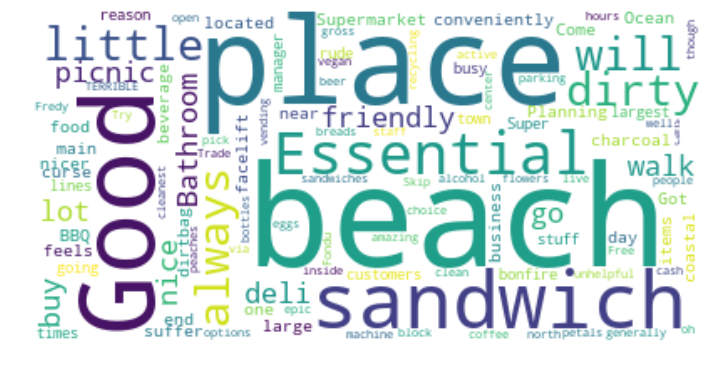

In [118]:
stopwords.add('Safeway') # add the words said to stopwords

# re-generate the word cloud
safeway_wc.generate(text)

# display the cloud
fig = plt.figure()
fig.set_figwidth(12) # set width
fig.set_figheight(18) # set height

plt.imshow(safeway_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [108]:
# generate a word cloud for all foursquare reviews of Rainbow Grocery 
# one of the highest scoring grocery stores in SF (9.3 out of 10)

text_rainbow= ("Apple Pay available here! I’m now obsessed. Bulk olive oil, soy sauce, every kind of rice and nut, and the prettiest damned produce I’ve ever seen. Bulk section’s great. I love the grind your own fresh hazelnut and dark chocolate butter! Way better than that Nutella stuff. Come for the nutritional yeast, stay for the Bulk everything. Rainbow Grocery is pretty much my reason for visiting San Francisco on a regular basis. Best grocery store in the world, hands down. All vegetarian, ethical and loads of fun. Huge space, bulk section is great! Use their bulk foods to get great quality and cost effective foods. Experiment! Best grocery store in SF hands down. You will find everything here fresh. Only problem- no meats! Produce almost as good as the farmers market (but 3x more in price, and worth the convenience). They have the ingredients to make Burma superstars tea leaf salad at home! Also incredible unique juices Everything is organic and fresh from the farm. Terrific varieties, all vegetarian. Cheap healthy organic foods from local farmers! They have bulk oils and soaps. Miso pastes are not bad. Smoked salt is MAGNIFICENT worker owned and operated shop. Stumbled upon it by chance and left wanting to eat/taste/drink it all. This is the definitive go-to grocery emporium for fresh, natural produce lovers. Bulk stuff is not necessarily cheaper than TJs or WhF, but they win at obscure stuff like nutritional yeast, vegan kimchi, local honey, fancy loose tea, vegan fresh meals, bulk moisturizer (!). Yep. Loads of healthy, ethical products. Great for vegetarians and vegans Pro tip: their bulk coffee (by the likes of four barrel, de la Paz, stumptown, etc) is a lot cheaper than buying in cafes. Great bulk section and huge offering of organic and healthy products. For all of your bulk vegetarian needs. There is so much to like about this place. One of the largest bulk sections around! All of the produce is organic. YUM !! Good place for Vegan food. But everything is overpriced, is around 40% more expensive than other places This place is amazing. Best produce in town. Bulk bin everything. Weird, new, and random vegan things. Literally the best vegan cheese selection you'll find. Actually, their whole cheese selection is legit. Locally made and owned everything. Probably the best grocery store in San Francisco. Love the spice section here. Good selection of gluten free bread Love this store. Organic produce is of best quality. Wish there were more of these stores around . This kind of grocery store is just amazing! Choices, nice service... very helpfull! Nice selection of natural foods. You can refill your soap containers but doing so it's more expensive than it should You can buy a bag of Stumptown Coffee beans here. The various styles of kimchi in the fermented foods bulk bin aisle blow my mind. What Whole Foods dreams it was. Best market in town. Everything is sooooo good The dried pea soup is the best I have ever had and perfect for backpacking Best damn grocery store in SF -- they have Xanthm gum in bulk so you don't have to spend a million dollars on a large bag. Waay better than Whole Foods Great bulk section, cheese selection, honey, bath and body products. Quality establishment. No meat, unfortunately, and a little overpriced, but good quality produce. Also good for specialty products and supplements. Comparable to any cheese hawker you might find in France. The staff is remarkable and gracious with their cheese prowess, reigning over a selection that includes on average 350 varieties Amazing place to get groceries. Fantastic bulk bin selection of teas, spices, oils, nut butters, and grains. Fantastic vegan selection! The vast array of tofu keeps me coming back. Amazing vegetarian co-op grocery store. Love their cheese department especially. It's kinda pricey but everything is high quality This is chef's heaven! Probably my least favorite store in SF. Habanero salt. Spicy cashew nuts. 'Nuff said!! The customer service here is awful. Cashier in particular. The clerks in the aisles are much better. Vegetarian - but sells fish oil? Bulk section is incredible. A vegetarian paradise, but very over expensive Hemp powder next to the whey powder Ps they don't sell meat products. #howwasisupposedtoknow A vegan gold mine! Has @siggisdairy, Straus @milk and @FieldRoast. Lots of fresh vegetables, fruits, cheeses and everything you could ask for. I'm so glad I can walk to this place :) Favorite grocery (next to Berkeley bowl). No meat products. Acquire your prosciutto somewhere else. Try the hazelnut butter Better produce than trader joes if you need rennet for cheese making, ask for it at the cheese counter. Liquid rennet for $7 Love the rock music always playing in the refrigerated dairy section! Vegan cream cheese brownie omg Fantastic fresh produce for much cheaper than whole foods Best chocolate selection, including American craft chocolatiers. Try Madre and Taza! Good music. Especially in the dairy case. Great organic and local options, and their cheese shop is outstanding. Wish they carried local, organic meats. But all veggie here. Screw bi rite this place is much better and cheaper They sell raw whole milk here which is the healthier choice. Don't forget to bring your plastic bags and mason jars for the bulk section! pop an allergy pill few hours before you enter here if your allergic to certain nuts or flour! Esther's German Bread and Pretzels. Yum. Love this place . The only negative is the staff, some are rude. Never miss this wonderful venue! The best selection of natural products and foods. Simply amazing. Lots of fresh goodness. Open from 9 am til 9 pm Stocking inanimate inventory is apparently more important than assisting humans here. You pretty much have to help yourself. Bad customer service in the makeup department. This grocery store is worker owned and 99.8 percent vegetarian. The only meat you'll find here is their pet food and the animal rennet in some of their clearly marked cheeses. FYI - they don't sell meat or fish here Nice selection of natural, organic, and gluten free options. I was impressed Open the dairy coolers in the back. There's a dance party going on in there! No more SFBC discount. If you need a restroom in a pinch, the key is at the front service counter. Awesome store but why does everyone look so miserable? tip for rainbow grocery northside Buy anything a cute guy recommends but try not to stalk him through the store. Bring your own bags, containers. Be good to others If you are into organic food this place is heaven. Pleasantly surprised by the awesome quality of foods and meats! Often crowded and crazy, but its a mecca for healthy food and natural beauty products Best place to grocery shop!!!! Best Hungarian paprika you can get in San Francisco. You can also get quark and cheese curds here. Try the Walnut butter, it's in the back by the bulk. Comes from Berkeley! Great selection of fresh produce!!! Best retail business opportunity in SF: open an ethical meat store next door to Rainbow, be guaranteed plenty of business from people sick of shuttling between Rainbow and Trader Joes or Bi-Rite. Try the bulk soup mixes sometime! Parking can be a beast, but if you're looking for something more natural/healthier, they probably have it. Also, they're really great about bulk orders, just call and ask. small sitting / waiting area w electrical outlets but no WIFI. Love bulk lotion and you can bring own bottle, weigh, fill and weigh before pay! Act super pretentious There are always free samples at the olive bar and the cheese department. Sometimes there are free samples in front of the customer service desk and the freezer section. The anchor of all natural food stores in SF. Huge bulk section, awesome specials area, sale produce and dry goods, organic everything. NO MEAT! 20% off when you buy $100 of supplements. Great place to shop for groceries in SF! They have everything. Also, if you're lucky get the non-gluten free pastry with poppies and cherries, it is to die for! This has everything... except meat! The only place you can save money on all the bulk spices. i love grocery stores. (yummy earth chile lollipops and amazing tea selection!) Making myself feel like a better person one co-op at a time. For a good laugh, check out the homeopathy guides! Heather Shames Great cheese selection and helpful cheese dept. Cashiers generally seem to be rude. If you're part owner, then act like you care. Always closed on LGBT Pride Day If you forget your bike lock, you can borrow one of theirs SF Weekly's Best Of 2011 Winner - Reader's Poll - BEST GROCERY STORE The Fox Barrel Pacific Pear is fantastic! Fermented using 100% pure pear-juice and Gluten-free! Spice section is the best I've seen.. berbere & harissa spice powders just arrived. Veggie section is loaded with fresh greens and a large variety of mushrooms.. organic grocery heaven! Make sure to sample the featured cheese of the day by the cheese department in the back of the store Drive here in your gas guzzling suv. Idle on the street while waiting for a parking spot. Bemoan the fact that they don't sell meat! Cell Food :) Someone should open a free-range organic blah blah hippy butcher/meat shop next door and make a killing! Too bad they don't sell meat here! But they do sell fractal broccoli Too bad they don't sell meat here! SF Weekly's Best of Winner 2010 - Reader's Poll - BEST PRODUCE A gold mine for organic toiletries. Glad there isn't more parking, otherwise navigating inside the store would be impossible! And they'd run out of delicious cheese samples. A post modern collection of everything natural, local and healthy in San Francisco. You can find anything. Just don’t ask for steak! -Yigit Pura, Top Chef Just Desserts girls get your make-up here, high quality & soo good for the skin Bring baggies and bottles. They have the best bulk selection in the city. porcini mushroom ravioli and raw almond butter are my favs. Vegan cupcakes, baby! Parking off Division is a fucking nightmare. Small lot across Fulsom from the side door tends to be pretty empty and there's a sign about a new one. Haven't tried it. Worker-owned, with the freshest local produce outside of the farmer's market. Great cheese selection. Bulk area is expansive and prices are fair. -Preeti Mistry, Top Chef 20% off on Thursdays...find the coupon in the SF phone book For mimosa lovers, buy the Cristalino Cava for $7.99 and host brilliant brunch with friends. Salud! Dried mangoes, no additives, in bulk. Mmmm, good. Also try mulberries (great for diabetics!) market warning: no meat sold here... but still high quality everything else Show your SF Bike Coalition membership card, and get 10% off! Beeline to the olive samples, beeline to the cheese sample. Ride your bike there, use your SFBC bike card and get a discount! shop on Wednesday or Thursday with AT&T phonebook coupons and save 20%")


In [109]:
stopwords = set(STOPWORDS)

In [110]:
# instantiate a word cloud object
rainbow_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
rainbow_wc.generate(text_rainbow)

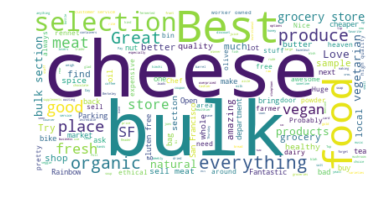

In [111]:
# display the word cloud
plt.imshow(rainbow_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

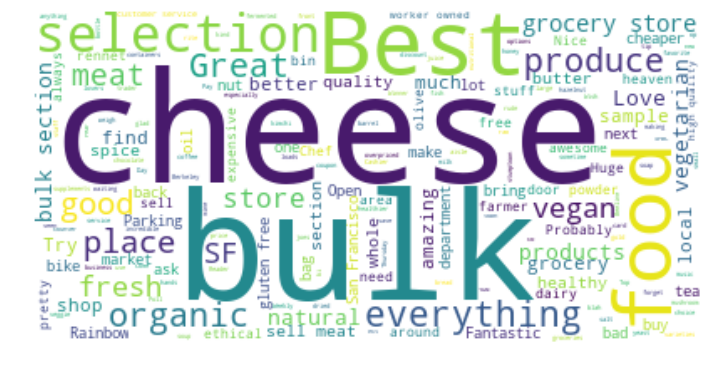

In [112]:
fig = plt.figure()
fig.set_figwidth(12) # set width
fig.set_figheight(16) # set height

# display the cloud
plt.imshow(rainbow_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

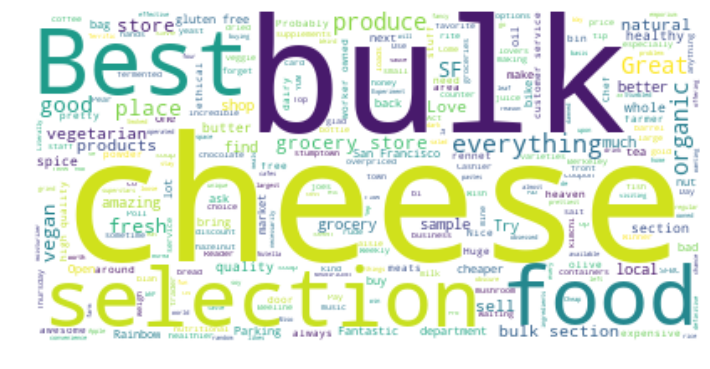

In [115]:
stopwords.add('meat') # add the words said to stopwords

# re-generate the word cloud
rainbow_wc.generate(text_rainbow)

# display the cloud
fig = plt.figure()
fig.set_figwidth(12) # set width
fig.set_figheight(18) # set height

plt.imshow(rainbow_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [168]:
<iframe src="https://www.google.com/maps/embed?pb=!1m18!1m12!1m3!1d39494.14986840691!2d-122.53356141239412!3d37.781064084687124!2m3!1f0!2f0!3f0!3m2!1i1024!2i768!4f13.1!3m3!1m2!1s0x808587ae0582a7eb%3A0x568646b5bc4a98ee!2sOuter%20Richmond%2C%20San%20Francisco%2C%20CA%2094121!5e0!3m2!1sen!2sus!4v1582260394660!5m2!1sen!2sus" width="600" height="450" frameborder="0" style="border:0;" allowfullscreen=""></iframe>

ModuleNotFoundError: No module named 'urllib2'